In [16]:
#import libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, f1_score
import shap


In [2]:


# Load dataset
df = pd.read_csv('synthetic_user_risk_data.csv')
df.info()
df['risk_tier_code'] = df['risk_tier'].map({'Low': 0, 'Medium': 1, 'High': 2})
features = df.drop(columns=["user_id", "risk_tier"]).columns.tolist()
print (features)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   user_id                  1000 non-null   int64  
 1   avg_txn_amount           1000 non-null   float64
 2   txn_freq_per_day         1000 non-null   int64  
 3   night_txn_ratio          1000 non-null   float64
 4   geo_diversity_score      1000 non-null   int64  
 5   device_changes_last_30d  1000 non-null   int64  
 6   foreign_txn_count        1000 non-null   int64  
 7   return_txn_ratio         1000 non-null   float64
 8   linked_accounts_count    1000 non-null   int64  
 9   risk_tier                1000 non-null   object 
dtypes: float64(3), int64(6), object(1)
memory usage: 78.3+ KB
['avg_txn_amount', 'txn_freq_per_day', 'night_txn_ratio', 'geo_diversity_score', 'device_changes_last_30d', 'foreign_txn_count', 'return_txn_ratio', 'linked_accounts_count', 'risk_tie

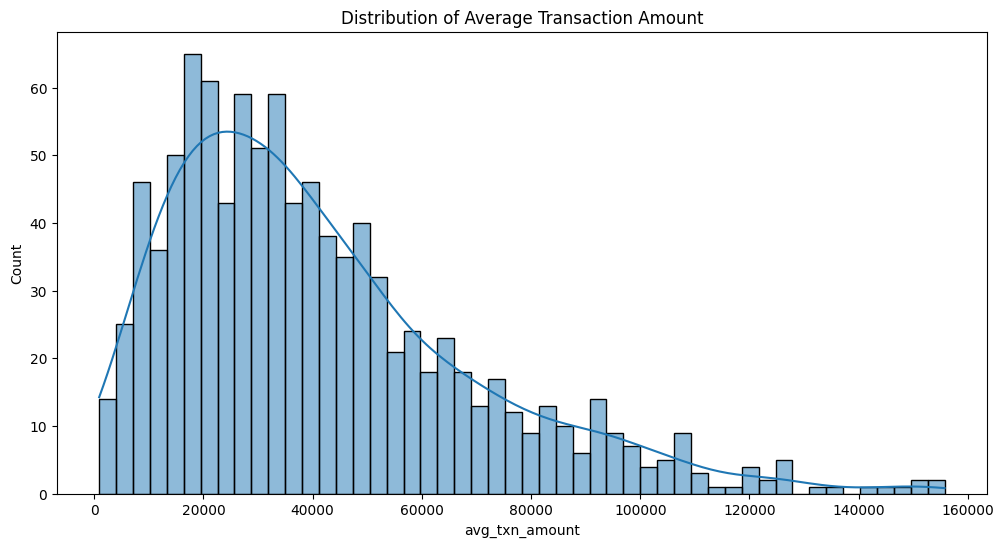

C:\Users\tusha\AppData\Local\Temp\ipykernel_32740\2698105793.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='risk_tier', order=['Low', 'Medium', 'High'], palette="viridis")


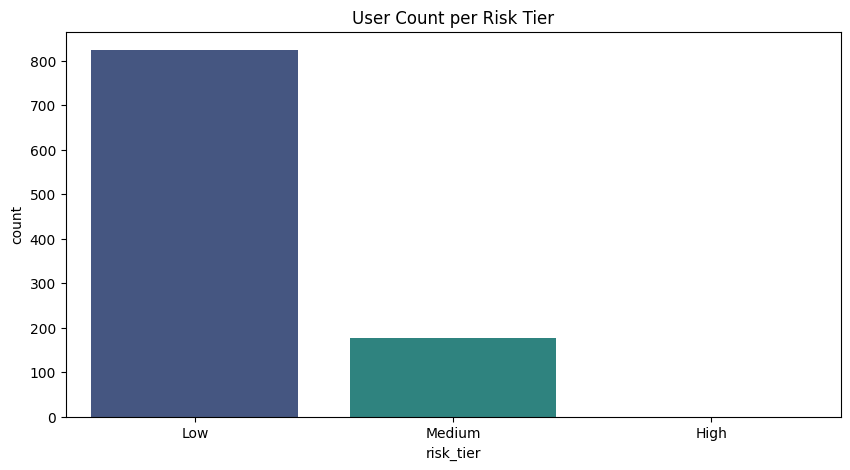

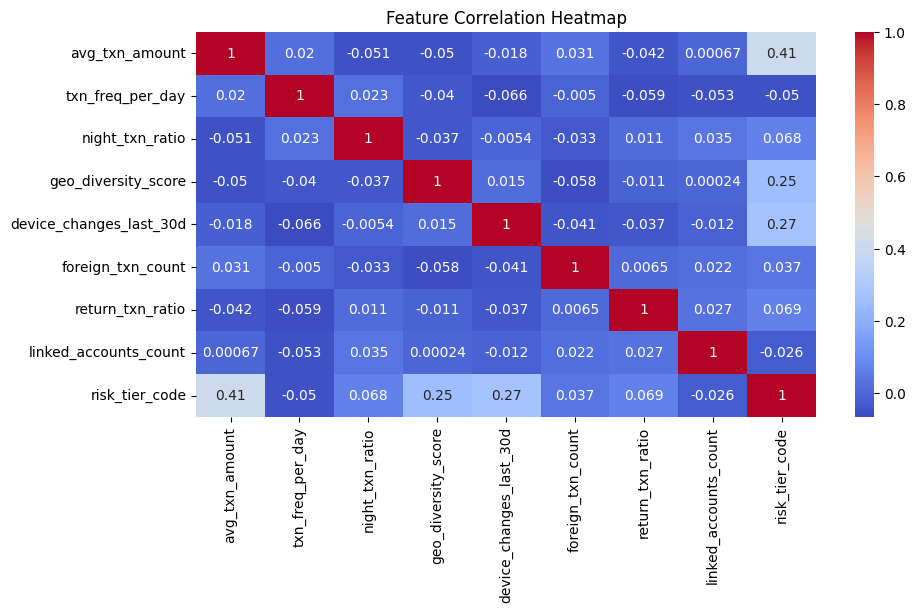

In [3]:

 #Visualize Feature Distributions

plt.figure(figsize=(12, 6))
sns.histplot(df['avg_txn_amount'], bins=50, kde=True)
plt.title("Distribution of Average Transaction Amount")
plt.show()

plt.figure(figsize=(10, 5))
sns.countplot(data=df, x='risk_tier', order=['Low', 'Medium', 'High'], palette="viridis")
plt.title("User Count per Risk Tier")
plt.show()

# Correlation heatmap
plt.figure(figsize=(10, 5))
sns.heatmap(df.drop(['user_id','risk_tier'], axis=1).corr(), annot=True, cmap='coolwarm')
plt.title("Feature Correlation Heatmap")
plt.show()


c:\Users\tusha\OneDrive\Desktop\USER RISK TIER PROJECT\venv\Lib\site-packages\sklearn\linear_model\_logistic.py:1254: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, binary problems will be fit as proper binary  logistic regression models (as if multi_class='ovr' were set). Leave it to its default value to avoid this warning.
  warnings.warn(


 Logistic Regression Results
              precision    recall  f1-score   support

           0       0.94      0.96      0.95       171
           1       0.73      0.66      0.69        29

    accuracy                           0.92       200
   macro avg       0.84      0.81      0.82       200
weighted avg       0.91      0.92      0.91       200



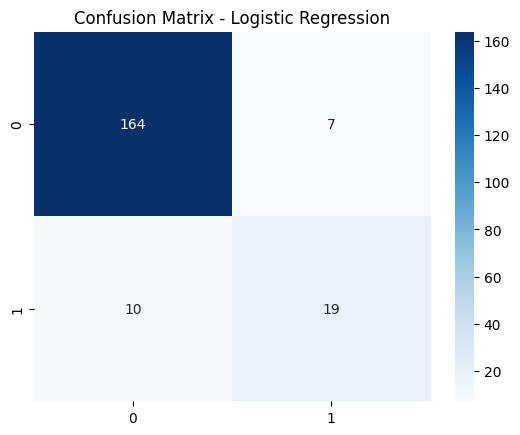

 Random Forest Results
              precision    recall  f1-score   support

           0       1.00      0.98      0.99       171
           1       0.88      1.00      0.94        29

    accuracy                           0.98       200
   macro avg       0.94      0.99      0.96       200
weighted avg       0.98      0.98      0.98       200



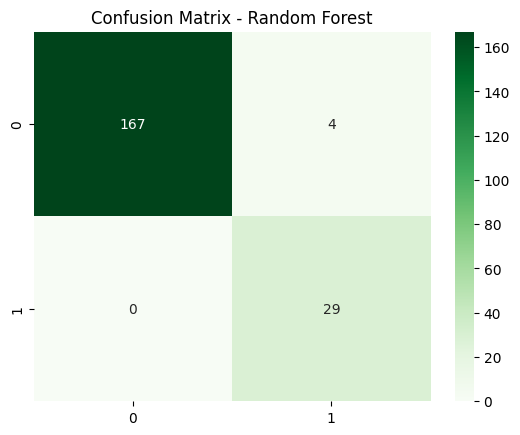

In [ ]:

#Feature Engineering

df['risk_tier_code'] = df['risk_tier'].map({'Low': 0, 'Medium': 1, 'High': 2})

X = df.drop(['user_id', 'risk_tier', 'risk_tier_code'], axis=1)
y = df['risk_tier_code']





# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# Feature scaling (important for logistic regression)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

#  Logistic Regression
log_model = LogisticRegression(multi_class='multinomial', solver='lbfgs', max_iter=500)
log_model.fit(X_train_scaled, y_train)
y_pred_log = log_model.predict(X_test_scaled)

print(" Logistic Regression Results")
print(classification_report(y_test, y_pred_log))
sns.heatmap(confusion_matrix(y_test, y_pred_log), annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix - Logistic Regression')
plt.show()

#  Random Forest Classifier
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)  
y_pred_rf = rf_model.predict(X_test)

print(" Random Forest Results")
print(classification_report(y_test, y_pred_rf))
sns.heatmap(confusion_matrix(y_test, y_pred_rf), annot=True, fmt='d', cmap='Greens')
plt.title('Confusion Matrix - Random Forest')
plt.show()



c:\Users\tusha\OneDrive\Desktop\USER RISK TIER PROJECT\venv\Lib\site-packages\sklearn\linear_model\_logistic.py:1254: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, binary problems will be fit as proper binary  logistic regression models (as if multi_class='ovr' were set). Leave it to its default value to avoid this warning.
  warnings.warn(
c:\Users\tusha\OneDrive\Desktop\USER RISK TIER PROJECT\venv\Lib\site-packages\sklearn\linear_model\_logistic.py:1254: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, binary problems will be fit as proper binary  logistic regression models (as if multi_class='ovr' were set). Leave it to its default value to avoid this warning.
  warnings.warn(
c:\Users\tusha\OneDrive\Desktop\USER RISK TIER PROJECT\venv\Lib\site-packages\sklearn\linear_model\_logistic.py:1254: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7.

Logistic Regression Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.96      0.95       171
           1       0.73      0.66      0.69        29

    accuracy                           0.92       200
   macro avg       0.84      0.81      0.82       200
weighted avg       0.91      0.92      0.91       200



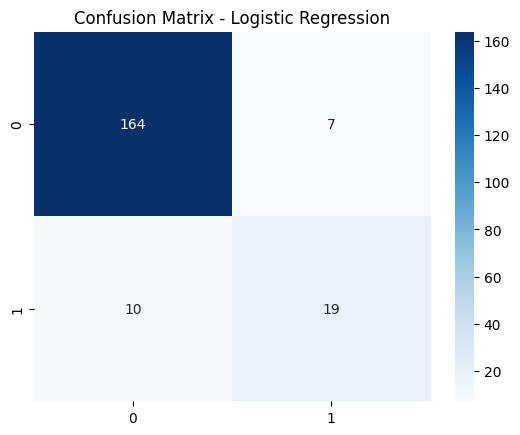

 Random Forest Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.98      0.99       171
           1       0.91      1.00      0.95        29

    accuracy                           0.98       200
   macro avg       0.95      0.99      0.97       200
weighted avg       0.99      0.98      0.99       200



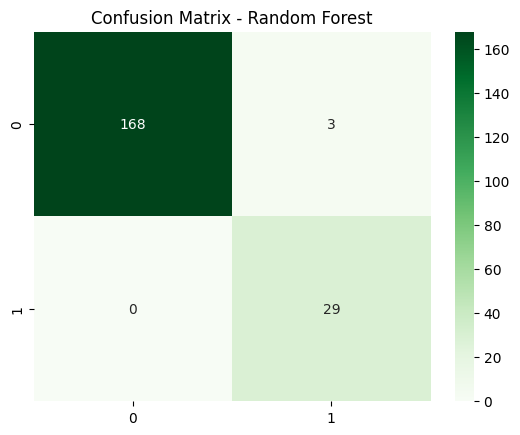

<Figure size 800x400 with 0 Axes>

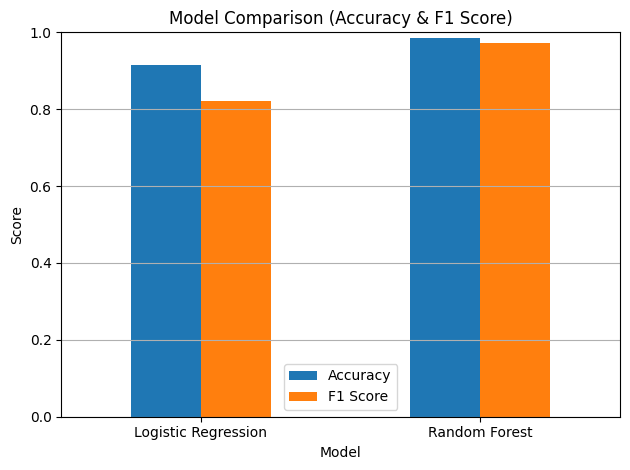

In [18]:
 #Logistic Regression with GridSearchCV
log_params = {
    'C': [0.01, 0.1, 1, 10],
    'solver': ['lbfgs', 'newton-cg'],
    'multi_class': ['multinomial']
}
log_grid = GridSearchCV(LogisticRegression(max_iter=500), log_params, cv=5, scoring='f1_macro')
log_grid.fit(X_train_scaled, y_train)
y_pred_log = log_grid.predict(X_test_scaled)

# Random Forest with GridSearchCV
rf_params = {
    'n_estimators': [100, 200],
    'max_depth': [5, 10, None],
    'min_samples_split': [2, 5]
}
rf_grid = GridSearchCV(RandomForestClassifier(random_state=42), rf_params, cv=5, scoring='f1_macro')
rf_grid.fit(X_train, y_train)
y_pred_rf = rf_grid.predict(X_test)

# Evaluation
log_acc = accuracy_score(y_test, y_pred_log)
rf_acc = accuracy_score(y_test, y_pred_rf)
log_f1 = f1_score(y_test, y_pred_log, average='macro')
rf_f1 = f1_score(y_test, y_pred_rf, average='macro')

print("Logistic Regression Classification Report:")
print(classification_report(y_test, y_pred_log))
sns.heatmap(confusion_matrix(y_test, y_pred_log), annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix - Logistic Regression')
plt.show()
print(" Random Forest Classification Report:")
print(classification_report(y_test, y_pred_rf))
sns.heatmap(confusion_matrix(y_test, y_pred_rf), annot=True, fmt='d', cmap='Greens')
plt.title('Confusion Matrix - Random Forest')
plt.show()

# Model Comparison Plot
plt.figure(figsize=(8, 4))
bar_data = pd.DataFrame({
    'Model': ['Logistic Regression', 'Random Forest'],
    'Accuracy': [log_acc, rf_acc],
    'F1 Score': [log_f1, rf_f1]
})
bar_data.set_index('Model')[['Accuracy', 'F1 Score']].plot(kind='bar', ylim=(0,1), rot=0)
plt.title('Model Comparison (Accuracy & F1 Score)')
plt.ylabel('Score')
plt.grid(axis='y')
plt.tight_layout()
plt.show()